In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/parkinsons-disease-dataset-analysis/parkinsons_disease_data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data=pd.read_csv("/kaggle/input/parkinsons-disease-dataset-analysis/parkinsons_disease_data.csv")
pd.set_option('display.max_columns', None)

In [4]:
categorical_values=['Gender','Ethnicity','EducationLevel','Smoking','FamilyHistoryParkinsons','TraumaticBrainInjury','Hypertension','Diabetes',
                   'Depression','Stroke','Tremor','Rigidity','Bradykinesia','PosturalInstability','SpeechProblems','SleepDisorders',
                   'Constipation','Diagnosis']

continuous_values=['Age','BMI','AlcoholConsumption','PhysicalActivity','DietQuality','SleepQuality','SystolicBP','DiastolicBP','CholesterolTotal',
                  'CholesterolLDL','CholesterolHDL','CholesterolTriglycerides','UPDRS','MoCA','FunctionalAssessment']

print(f'total categorical variables = {len(categorical_values)}')
print(f'total continuous variables = {len(continuous_values)}')

total categorical variables = 18
total continuous variables = 15


In [5]:
dt=data.iloc[:,1:-1]
dt.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,0,0,0,0,0,0,129,60,222.842278,148.125623,37.867776,337.307114,6.458713,29.181289,1.572427,1,0,0,0,0,0,0,0
1,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,0,0,0,0,0,0,163,76,210.501133,153.756463,77.228117,264.635521,37.306703,12.332639,4.787551,0,1,0,1,0,1,0,1
2,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,0,0,0,1,0,0,113,93,287.387996,118.702600,85.588304,395.662649,67.838170,29.927783,2.130686,1,0,0,0,1,0,1,1
3,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,0,0,0,0,0,0,146,78,280.339546,136.299186,51.869626,362.189688,52.964696,21.304268,3.391288,1,1,1,0,0,0,1,1
4,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925,0,0,0,0,0,0,115,94,284.014151,108.449452,25.069418,149.956586,21.804880,8.336364,3.200969,0,0,0,1,0,1,0,0


In [6]:
x=dt.iloc[:,:-1].values
x.shape


(2105, 32)

In [7]:
cols=dt.columns[:-1]
cols
cols.shape

(32,)

In [8]:
y=dt['Diagnosis'].values
y.shape


(2105,)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test= sc.transform(x_test)

In [11]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)


importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
importances.shape
for i in range(len(importances)):
    print(f"{cols[indices[i]]}: {importances[indices[i]]}")


UPDRS: 0.23000081288014523
FunctionalAssessment: 0.09995870349910628
Tremor: 0.0789392949484386
MoCA: 0.07779089062465744
Rigidity: 0.035418908494047364
SleepQuality: 0.03446232046498014
DietQuality: 0.03373332986535341
CholesterolTotal: 0.032391566852343144
Bradykinesia: 0.03170300259617313
CholesterolTriglycerides: 0.03170081971218328
AlcoholConsumption: 0.03126221484657267
Age: 0.031162508901030908
CholesterolHDL: 0.03109069796525679
CholesterolLDL: 0.029481196466380578
PhysicalActivity: 0.028527874563679348
BMI: 0.02801102712098593
SystolicBP: 0.02730957819038278
DiastolicBP: 0.025586860519471934
PosturalInstability: 0.01674326598166513
EducationLevel: 0.010652065042185093
Ethnicity: 0.008242167357025564
Depression: 0.006997622536908419
SleepDisorders: 0.00490165511778873
Smoking: 0.004880447498666244
Gender: 0.004788640062926879
Constipation: 0.004195608206138959
Hypertension: 0.003922606618308369
SpeechProblems: 0.003885178193485064
TraumaticBrainInjury: 0.0037833318463424675
Dia

  0%|          | 0/100 [00:00<?, ?it/s]

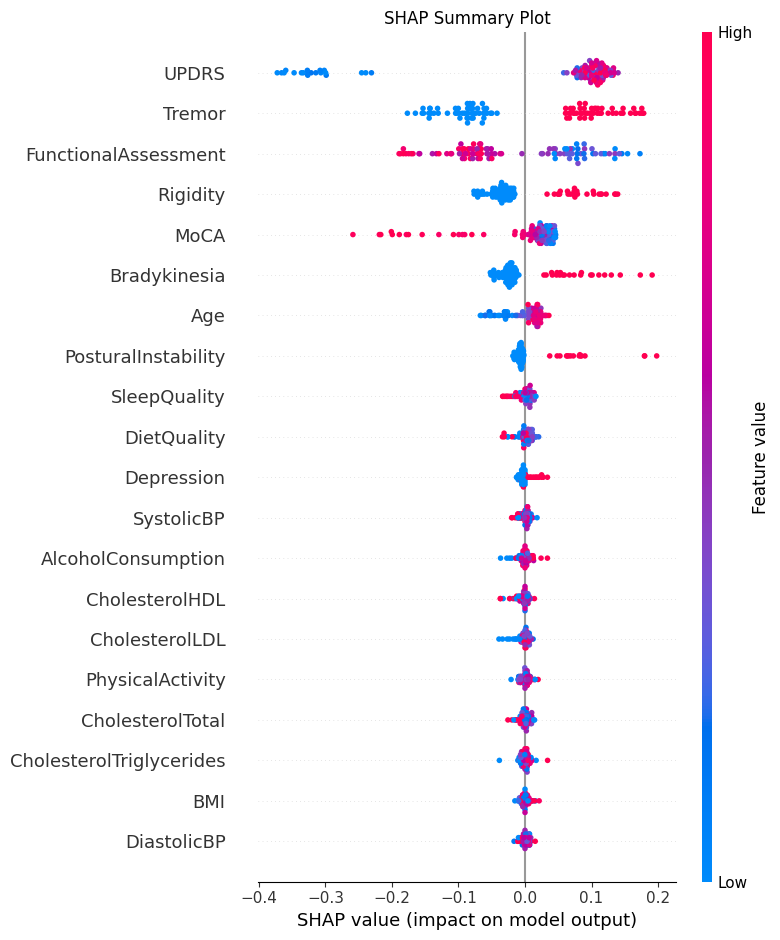

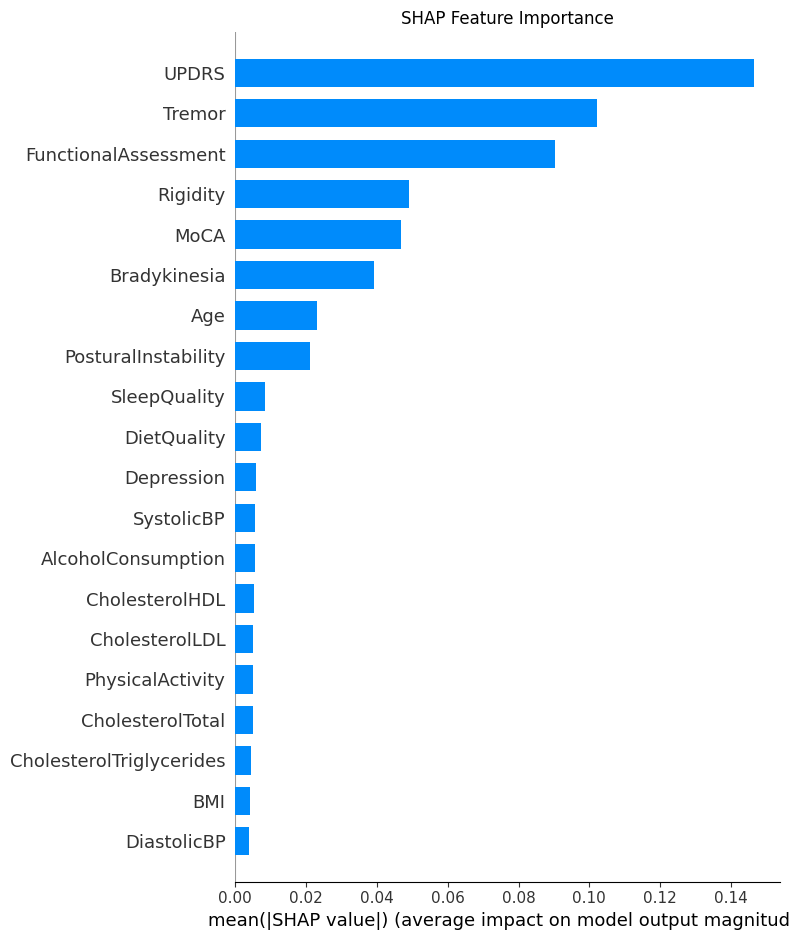


Feature Importance based on SHAP values:
--------------------------------------------------
UPDRS: 0.1466
Tremor: 0.1022
FunctionalAssessment: 0.0903
Rigidity: 0.0491
MoCA: 0.0467
Bradykinesia: 0.0391
Age: 0.0230
PosturalInstability: 0.0210
SleepQuality: 0.0083
DietQuality: 0.0073
Depression: 0.0059
SystolicBP: 0.0055
AlcoholConsumption: 0.0055
CholesterolHDL: 0.0052
CholesterolLDL: 0.0050
PhysicalActivity: 0.0050
CholesterolTotal: 0.0049
CholesterolTriglycerides: 0.0045
BMI: 0.0042
DiastolicBP: 0.0040
Ethnicity: 0.0025
Gender: 0.0023
EducationLevel: 0.0022
SpeechProblems: 0.0017
Diabetes: 0.0017
SleepDisorders: 0.0016
Constipation: 0.0014
FamilyHistoryParkinsons: 0.0013
TraumaticBrainInjury: 0.0012
Smoking: 0.0012
Hypertension: 0.0011
Stroke: 0.0005


In [13]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Create a background dataset for the KernelExplainer (using a subset of training data)
background_data = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

# Initialize the SHAP KernelExplainer
explainer = shap.KernelExplainer(model.predict_proba, background_data)

# Calculate SHAP values for a subset of test data (for computational efficiency)
sample_size = 100  # Adjust this based on your computational resources
sample_indices = np.random.choice(x_test.shape[0], sample_size, replace=False)
sampled_test_data = x_test[sample_indices]

# Calculate SHAP values
shap_values = explainer.shap_values(sampled_test_data)

# If binary classification, take the second class's SHAP values
if isinstance(shap_values, list):
    shap_values = shap_values[1]

# Create summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, sampled_test_data, feature_names=cols, show=False)
plt.title('SHAP Summary Plot')
plt.tight_layout()
plt.show()

# Bar plot of feature importance
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, sampled_test_data, feature_names=cols, plot_type='bar', show=False)
plt.title('SHAP Feature Importance')
plt.tight_layout()
plt.show()

# Calculate and print mean absolute SHAP values for each feature
mean_shap_values = np.abs(shap_values).mean(axis=0)
feature_importance_dict = dict(zip(cols, mean_shap_values))
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

print("\nFeature Importance based on SHAP values:")
print("-" * 50)
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")



# ADABOOST

In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [17]:
ada = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1), 
    n_estimators=100,                
    algorithm='SAMME.R',            
    random_state=42,
    learning_rate=0.1
)
ada.fit(x_train,y_train)


`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=100, random_state=42)

In [18]:
adapred=ada.predict(x_test)

  0%|          | 0/100 [00:00<?, ?it/s]

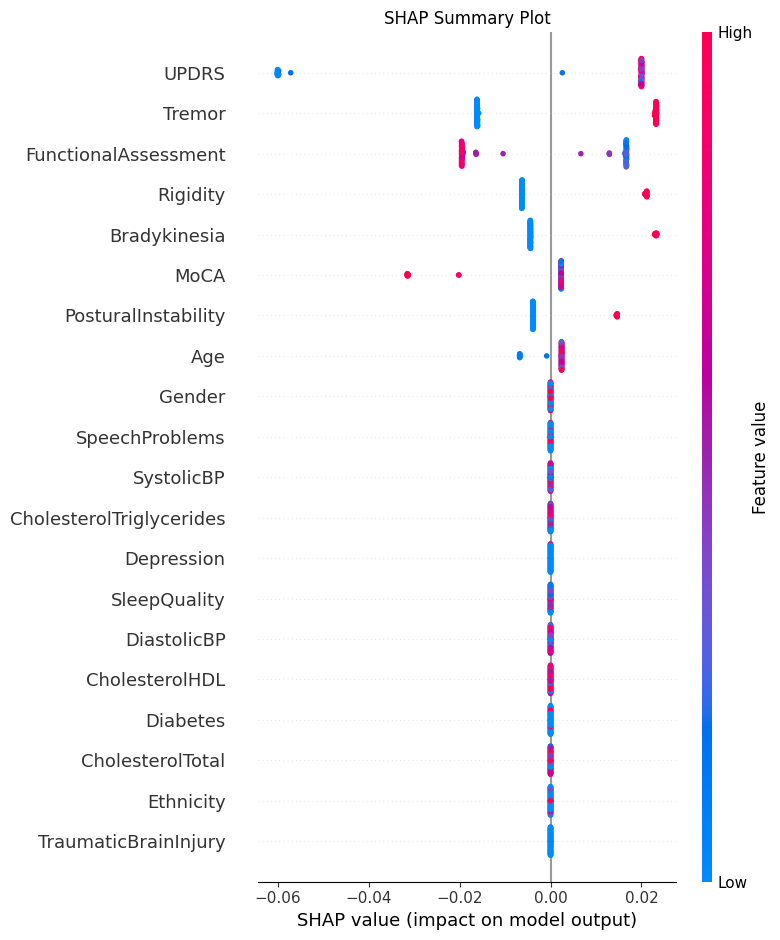

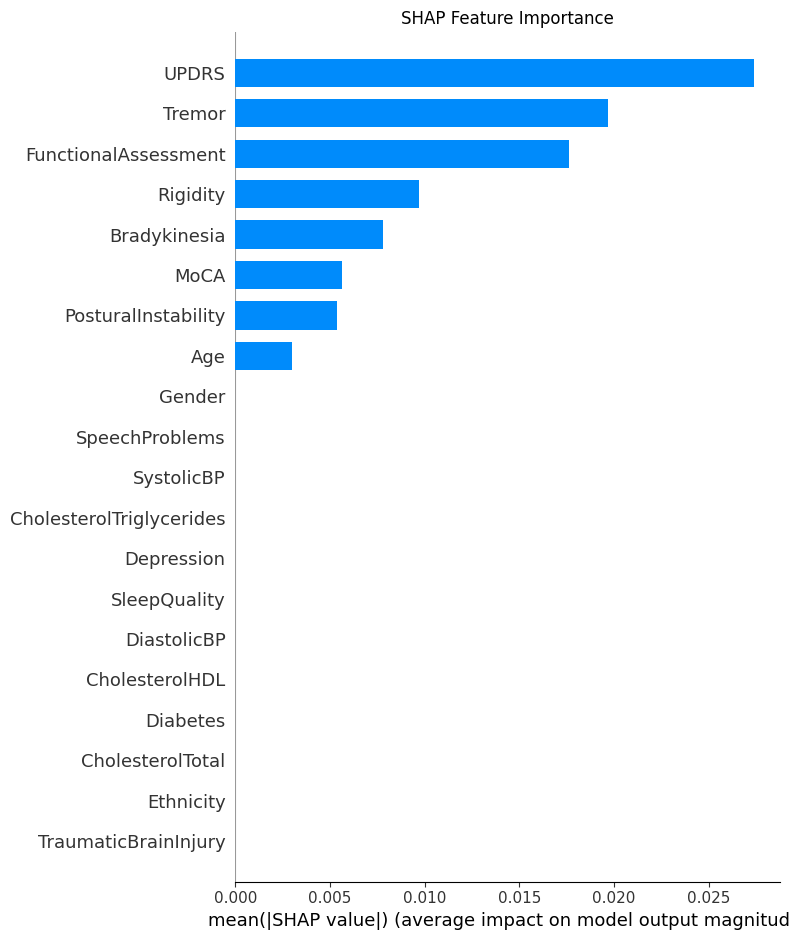


Feature Importance based on SHAP values:
--------------------------------------------------
UPDRS: 0.0274
Tremor: 0.0197
FunctionalAssessment: 0.0176
Rigidity: 0.0097
Bradykinesia: 0.0078
MoCA: 0.0056
PosturalInstability: 0.0054
Age: 0.0030
Gender: 0.0000
SpeechProblems: 0.0000
SystolicBP: 0.0000
CholesterolTriglycerides: 0.0000
Depression: 0.0000
SleepQuality: 0.0000
DiastolicBP: 0.0000
CholesterolHDL: 0.0000
Diabetes: 0.0000
CholesterolTotal: 0.0000
Ethnicity: 0.0000
TraumaticBrainInjury: 0.0000
EducationLevel: 0.0000
Smoking: 0.0000
PhysicalActivity: 0.0000
Stroke: 0.0000
Hypertension: 0.0000
AlcoholConsumption: 0.0000
SleepDisorders: 0.0000
Constipation: 0.0000
DietQuality: 0.0000
BMI: 0.0000
FamilyHistoryParkinsons: 0.0000
CholesterolLDL: 0.0000


In [19]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Create a background dataset for the KernelExplainer (using a subset of training data)
background_data = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

# Initialize the SHAP KernelExplainer
explainer = shap.KernelExplainer(ada.predict_proba, background_data)

# Calculate SHAP values for a subset of test data (for computational efficiency)
sample_size = 100  # Adjust this based on your computational resources
sample_indices = np.random.choice(x_test.shape[0], sample_size, replace=False)
sampled_test_data = x_test[sample_indices]

# Calculate SHAP values
shap_values = explainer.shap_values(sampled_test_data)

# If binary classification, take the second class's SHAP values
if isinstance(shap_values, list):
    shap_values = shap_values[1]

# Create summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, sampled_test_data, feature_names=cols, show=False)
plt.title('SHAP Summary Plot')
plt.tight_layout()
plt.show()

# Bar plot of feature importance
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, sampled_test_data, feature_names=cols, plot_type='bar', show=False)
plt.title('SHAP Feature Importance')
plt.tight_layout()
plt.show()

# Calculate and print mean absolute SHAP values for each feature
mean_shap_values = np.abs(shap_values).mean(axis=0)
feature_importance_dict = dict(zip(cols, mean_shap_values))
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

print("\nFeature Importance based on SHAP values:")
print("-" * 50)
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")



In [20]:
import lightgbm as lgbm

lgb = lgbm.LGBMClassifier(
    boosting_type='gbdt',          
    objective='binary',        
    metric='binary_error',       
    num_leaves=31,               
    max_depth=1,               
    learning_rate=0.1,           
    n_estimators=200,            
                 
)
lgb.fit(x_train, y_train)

lgbpred=lgb.predict(x_test)

[LightGBM] [Info] Number of positive: 897, number of negative: 576
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3308
[LightGBM] [Info] Number of data points in the train set: 1473, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.608961 -> initscore=0.442948
[LightGBM] [Info] Start training from score 0.442948


  0%|          | 0/100 [00:00<?, ?it/s]

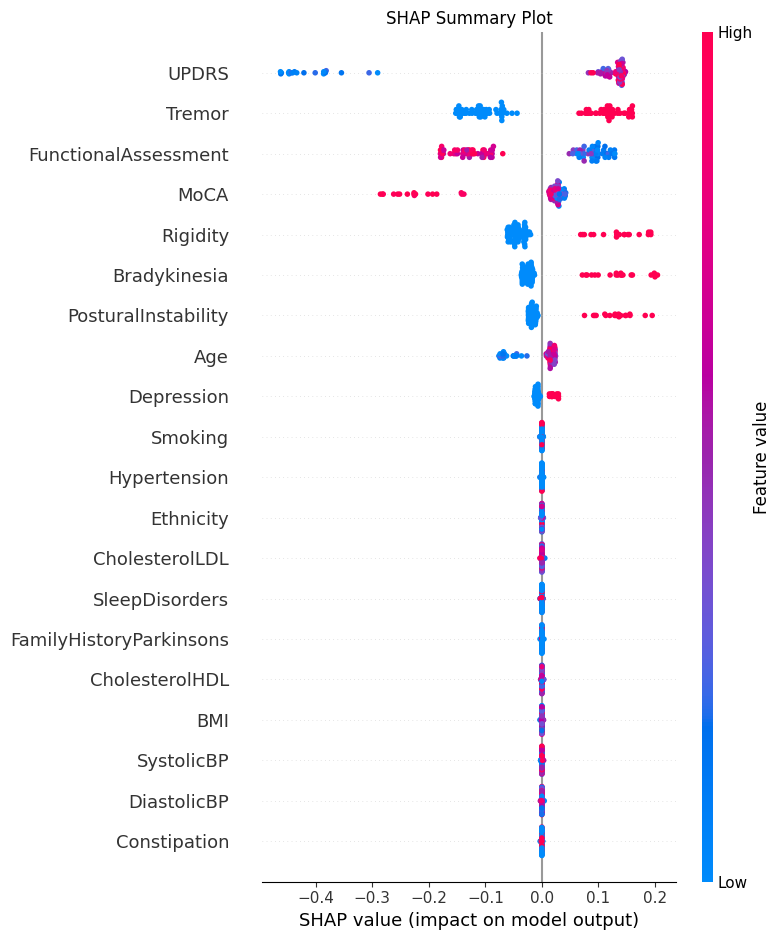

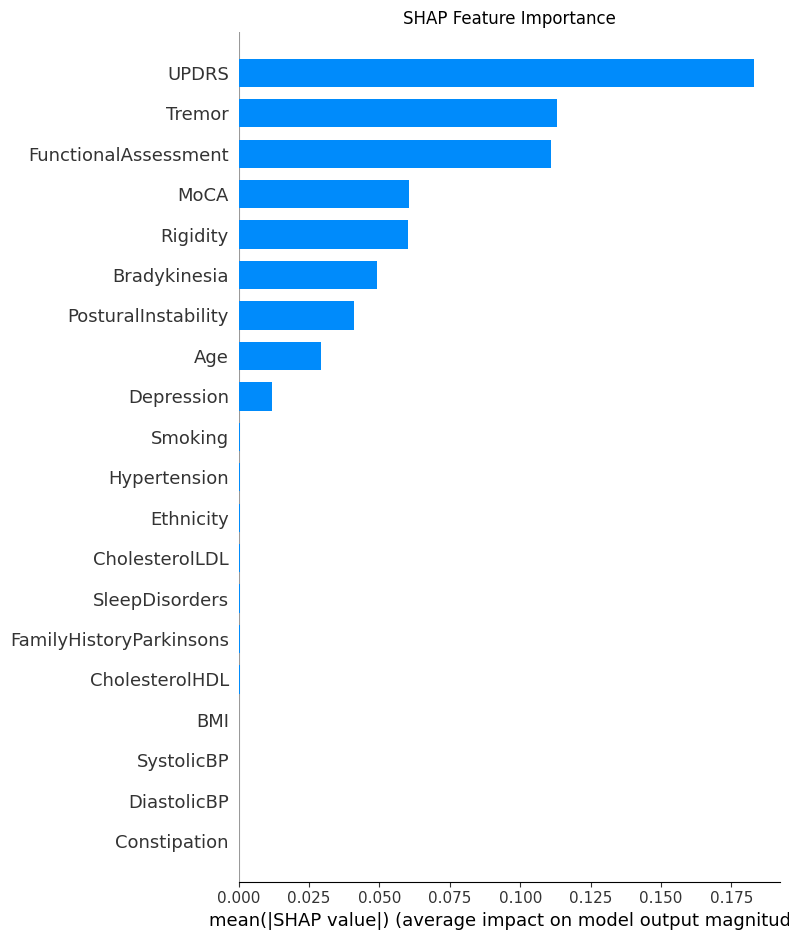


Feature Importance based on SHAP values:
--------------------------------------------------
UPDRS: 0.1831
Tremor: 0.1132
FunctionalAssessment: 0.1110
MoCA: 0.0605
Rigidity: 0.0603
Bradykinesia: 0.0493
PosturalInstability: 0.0410
Age: 0.0291
Depression: 0.0118
Smoking: 0.0003
Hypertension: 0.0003
Ethnicity: 0.0003
CholesterolLDL: 0.0003
SleepDisorders: 0.0003
FamilyHistoryParkinsons: 0.0003
CholesterolHDL: 0.0003
BMI: 0.0003
SystolicBP: 0.0003
DiastolicBP: 0.0003
Constipation: 0.0002
Diabetes: 0.0002
AlcoholConsumption: 0.0002
Stroke: 0.0002
PhysicalActivity: 0.0002
EducationLevel: 0.0002
Gender: 0.0002
SleepQuality: 0.0002
TraumaticBrainInjury: 0.0002
SpeechProblems: 0.0002
DietQuality: 0.0002
CholesterolTriglycerides: 0.0002
CholesterolTotal: 0.0001


In [21]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Create a background dataset for the KernelExplainer (using a subset of training data)
background_data = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

# Initialize the SHAP KernelExplainer
explainer = shap.KernelExplainer(lgb.predict_proba, background_data)

# Calculate SHAP values for a subset of test data (for computational efficiency)
sample_size = 100  # Adjust this based on your computational resources
sample_indices = np.random.choice(x_test.shape[0], sample_size, replace=False)
sampled_test_data = x_test[sample_indices]

# Calculate SHAP values
shap_values = explainer.shap_values(sampled_test_data)

# If binary classification, take the second class's SHAP values
if isinstance(shap_values, list):
    shap_values = shap_values[1]

# Create summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, sampled_test_data, feature_names=cols, show=False)
plt.title('SHAP Summary Plot')
plt.tight_layout()
plt.show()

# Bar plot of feature importance
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, sampled_test_data, feature_names=cols, plot_type='bar', show=False)
plt.title('SHAP Feature Importance')
plt.tight_layout()
plt.show()

# Calculate and print mean absolute SHAP values for each feature
mean_shap_values = np.abs(shap_values).mean(axis=0)
feature_importance_dict = dict(zip(cols, mean_shap_values))
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

print("\nFeature Importance based on SHAP values:")
print("-" * 50)
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")

